# Lab 2: Exploratory Data Analysis, Feature Engineering, and Feature Selection 


### Imports


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import category_encoders as ce

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Dataset 

Titanic Dataset  
Load using: seaborn

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Exercise 1: Exploratory Data Analysis (EDA)

### Step 1: Basic Understanding

Use df.info() and df.describe() to understand the structure and summary  
Display column types and count of missing values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(869)

In [9]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### Step 2: Identify Attribute Types 

Manually classify the following attributes:
- Categorical
- Numerical

In [10]:
numerical_cols = ['age', 'fare', 'sibsp', 'parch']
nominal_cols = ['sex', 'embarked', 'who', 'deck', 'embark_town', 'alive']
ordinal_cols = ['pclass', 'class']
binary_cols = ['survived', 'adult_male', 'alone']
target_col = ['survived']

numerical_cols = ['age', 'fare', 'sibsp', 'parch']
categorical_cols = ['sex', 'embarked', 'who', 'deck', 'embark_town', 'alive',
                    'pclass', 'class', 'survived', 'adult_male', 'alone']

In [11]:
for col in df.columns:
    if col == 'survived':
        print(f"{col} : Traget")
        continue
    if df[col].dtype in ['int64', 'float64']:
        print(f"{col} : Numerical")
    else:
        print(f"{col} : Catagorical")

survived : Traget
pclass : Numerical
sex : Catagorical
age : Numerical
sibsp : Numerical
parch : Numerical
fare : Numerical
embarked : Catagorical
class : Catagorical
who : Catagorical
adult_male : Catagorical
deck : Catagorical
embark_town : Catagorical
alive : Catagorical
alone : Catagorical


### Step 3: Understand Distribution of Attributes

Compute: mean, median, std, quartiles for age, fare, parch

In [12]:
for col in ['age', 'fare', 'parch']:
    if df[col].dtype in ['int64', 'float64']:
        print(col)
        print("mean:", df[col].mean())
        print("median:", df[col].median())
        print("mode:", df[col].mode())
        print("std:", df[col].std())
        print("quantile:")
        print(df[col].quantile([0, .25, .5, .75, 1]))
        print()

age
mean: 29.69911764705882
median: 28.0
mode: 0    24.0
Name: age, dtype: float64
std: 14.526497332334042
quantile:
0.00     0.420
0.25    20.125
0.50    28.000
0.75    38.000
1.00    80.000
Name: age, dtype: float64

fare
mean: 32.204207968574636
median: 14.4542
mode: 0    8.05
Name: fare, dtype: float64
std: 49.6934285971809
quantile:
0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: fare, dtype: float64

parch
mean: 0.38159371492704824
median: 0.0
mode: 0    0
Name: parch, dtype: int64
std: 0.8060572211299483
quantile:
0.00    0.0
0.25    0.0
0.50    0.0
0.75    0.0
1.00    6.0
Name: parch, dtype: float64



#### Plots 

Histogram for age, fare

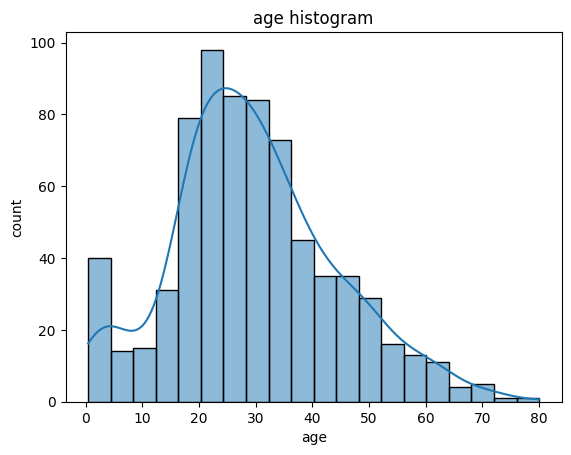

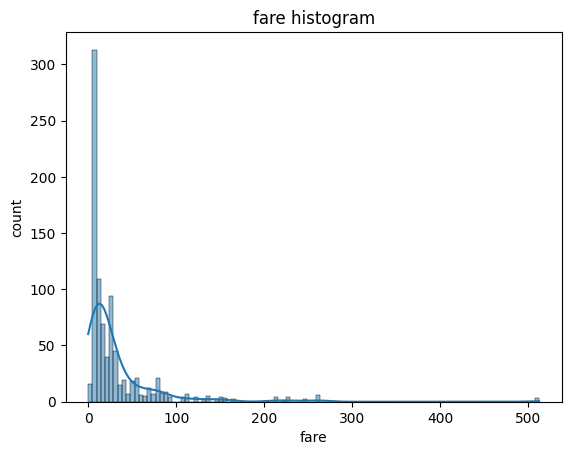

In [13]:
cols = ['age', 'fare']
for col in cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} histogram")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

Boxplots for age, fare

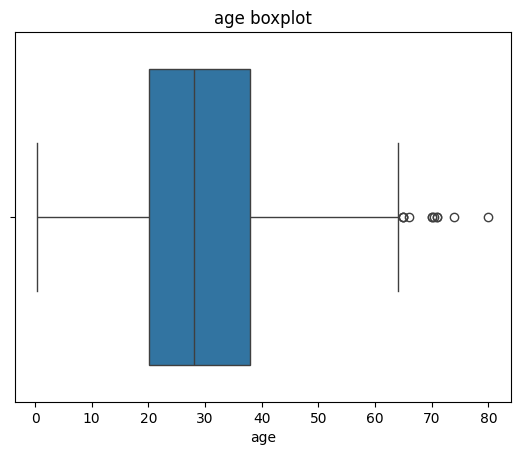

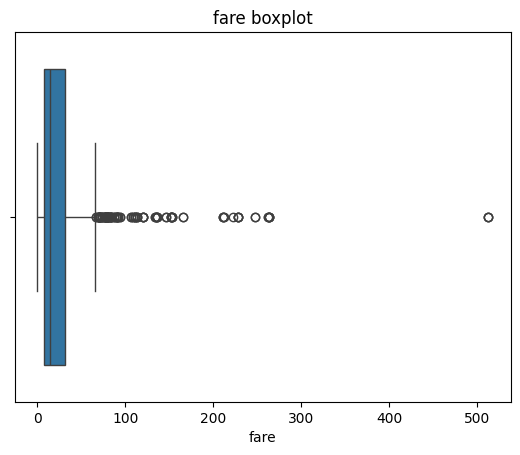

In [14]:
cols = ['age', 'fare']
for col in cols:
    sns.boxplot(x=df[col])
    plt.title(f"{col} boxplot")
    plt.xlabel(col)
    plt.show()

Countplots for sex, embarked, class 

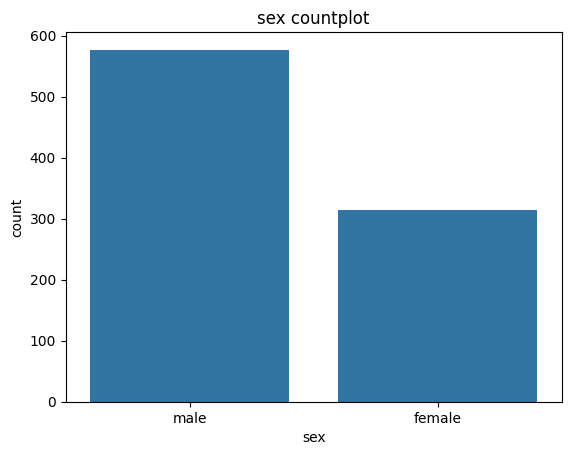

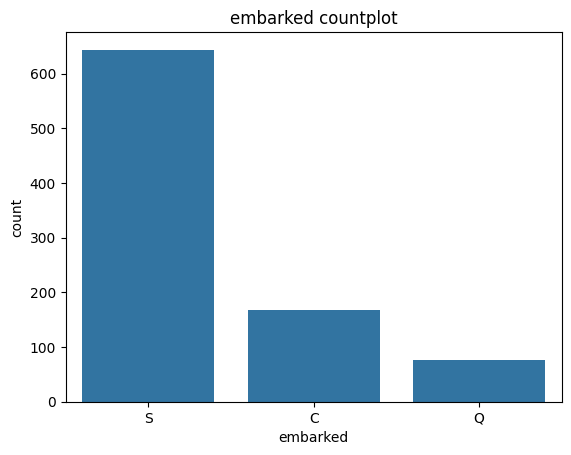

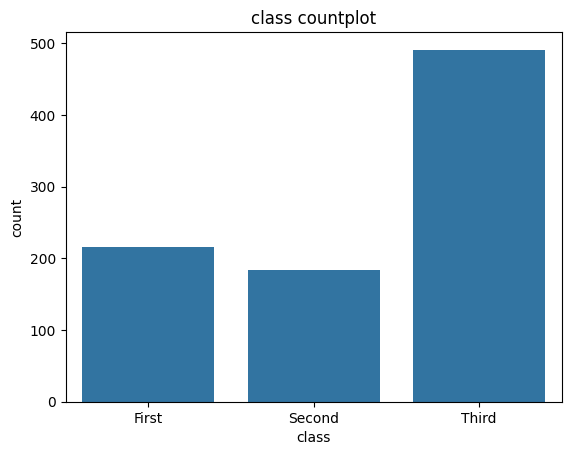

In [15]:
cols = ['sex', 'embarked', 'class']
for col in cols:
    sns.countplot(data=df, x=col)
    plt.title(f"{col} countplot")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

### Step 4: Understand Relationships Among Attributes

Plot scatterplot between age and fare

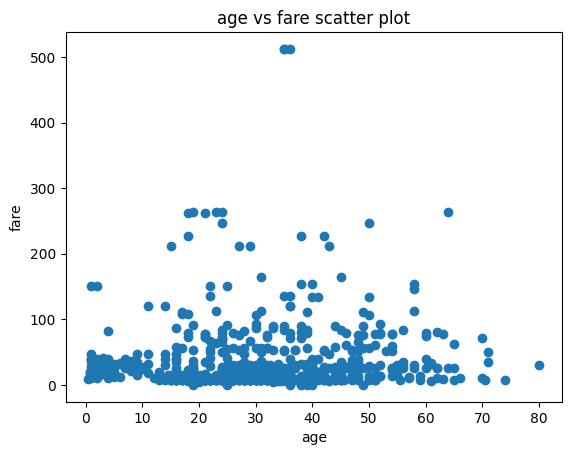

In [16]:
plt.scatter(df['age'], df['fare'])
plt.title("age vs fare scatter plot")
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

Compute and visualize Pearson correlation matrix for age, fare, parch, sibsp

In [17]:
corr_matrix = df[['age', 'fare', 'parch', 'sibsp']].corr(method='pearson')
corr_matrix

,age,fare,parch,sibsp
age,1.000000,0.096067,-0.189119,-0.308247
fare,0.096067,1.000000,0.216225,0.159651
parch,-0.189119,0.216225,1.000000,0.414838
sibsp,-0.308247,0.159651,0.414838,1.000000


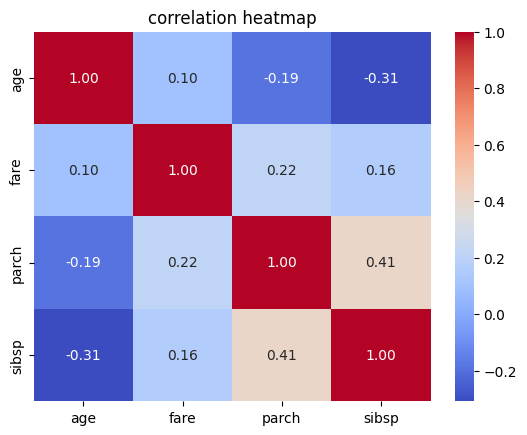

In [18]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt = '.2f')
plt.title("correlation heatmap")
plt.show()

Use pd.crosstab() between:
- sex vs survived
- embarked vs class

In [19]:
ssct = pd.crosstab(df['sex'], df['survived'], margins=True)
ssct

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [20]:
esct = pd.crosstab(df['embarked'], df['class'], margins=True)
esct

class,First,Second,Third,All
embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


### Step 5: Write down your observations from steps 3 and 4 

From the step 3
For age the mean and median are close so the distribution is fairly symmetric ans since q1 is ~20 and q3 is 38 we can say most of the people on board are in age range of 20-38. Which can be seen in the histogram.

The fare col mean is much higher then the median that means a right-skewed distribution which we can see in the histogram of fare and it means most passangers are low fares and only few paid high fare.

For the parch col everything is zero which mean almost everyone was traveling without parents or children only a small number of passengers had 1-6 parents or childrens aboard. The distribution is heavily right-skewed.

The boxplot of the age and fare suggest that there are outliers present in age and fare cols.

Form count plots we can see there are more males then females aboard and most people are in third class and most people embarked from southampton.

From step 4
In the scatter plot of age and fare there doesn't seem to be any relation other than most people paid a low fare less than 100 but it has nothing to do with age since all ages paid low fare not one particular group of ages. So fare and age seems to be independent of each other.

From the corelation heat map we don't see any strongly corrilated features but there is some corelation between (age, sibsp, modrate negative correlation(nc)), (age, parch, weak nc), (parch, fare, weak pc), (parch, sibsp, moderate pc)

From the crosstab of sex and survived we can see a high dependency most of the women survived while most of the man did not. 

From the crosstab of embarked and class we can see that most of the passengers were from southampton and they were the highest in numbers in each class. Shows that many lower-class passengers boarded here, possibly emigrants or workers. People embarked from cherbourg half of the people were in first class which suggests wealthier passengers often boarded at cherbourg. Queenstown was primarily for third-class passengers.

## Exercise 2: Feature Engineering 

### Step 1: Missing Value Handling

Impute:
- age with median
- embarked with mode
- Drop rows where deck is null 

In [21]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
df.fillna({'age': df['age'].median()}, inplace=True)
df['age'].isnull().sum()

np.int64(0)

In [23]:
df.fillna({'embarked': df['embarked'].mode()[0]}, inplace=True)
df['embarked'].isnull().sum()

np.int64(0)

In [24]:
df.dropna(subset=['deck'], inplace=True)
df['deck'].isnull().sum()

np.int64(0)

In [25]:
r = df[df['embark_town'].isnull()]
r

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,S,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,S,First,woman,False,B,NaN,yes,True


In [26]:
df['embark_town'].value_counts()

embark_town
Southampton    128
Cherbourg       69
Queenstown       4
Name: count, dtype: int64

In [27]:
df['embark_town'] = df['embark_town'].fillna('Southampton')
df['embark_town'].isnull().sum()

np.int64(0)

In [28]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Step 2: Outlier Detection and Handling

Plot boxplot and detect outliers in fare  
Cap outliers using IQR method 

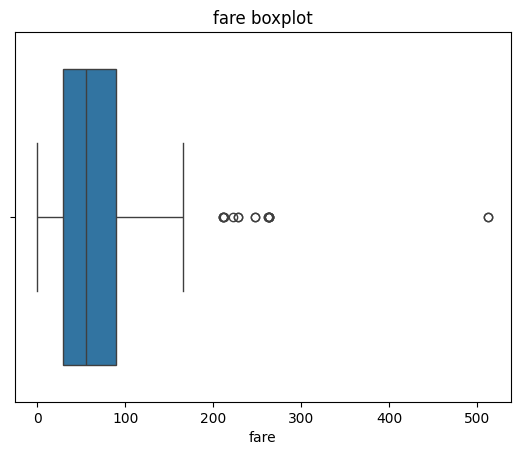

In [29]:
sns.boxplot(x=df['fare'])
plt.title("fare boxplot")
plt.xlabel("fare")
plt.show()

In [30]:
Q1 = df['fare'].quantile(0.25)
print(f"Q1: {Q1}")
Q3 = df['fare'].quantile(0.75)
print(f"Q3: {Q3}")
IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
print(f"lb: {lb}")
ub = Q3 + 1.5 * IQR
print(f"ub: {ub}")

Q1: 29.206249999999997
Q3: 89.5521
lb: -61.31252500000001
ub: 180.070875


In [31]:
outliers = df[(df['fare'] < lb) | (df['fare'] > ub)]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
377,0,1,male,27.0,0,2,211.5000,C,First,man,True,C,Cherbourg,no,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
527,0,1,male,28.0,0,0,221.7792,S,First,man,True,C,Southampton,no,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False


In [32]:
outliers.shape

(17, 15)

In [33]:
df['fare'] = df['fare'].apply(
    lambda x: lb if x < lb else (ub if x > ub else x)
)

In [34]:
outliers = df[(df['fare'] < lb) | (df['fare'] > ub)]
outliers.shape

(0, 15)

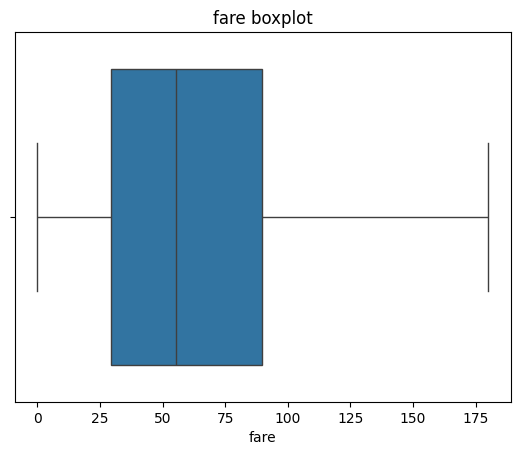

In [35]:
sns.boxplot(x=df['fare'])
plt.title("fare boxplot")
plt.xlabel("fare")
plt.show()

### Step 3: Normalization and Standardization

Apply:
- Min-Max Normalization on fare
- StandardScaler on age (use sklearn)

In [36]:
scaleM = MinMaxScaler()
df['fare_scaled'] = scaleM.fit_transform(df[['fare']])
df['fare_scaled'].head()

1     0.395862
3     0.294884
6     0.288012
10    0.092741
11    0.147442
Name: fare_scaled, dtype: float64

In [37]:
df['fare_scaled'].min()

np.float64(0.0)

In [38]:
df['fare_scaled'].max()

np.float64(1.0)

In [39]:
scaleS = StandardScaler()
df['age_scaled'] = scaleS.fit_transform(df[['age']])

In [40]:
df['age_scaled'].head()

1     0.195473
3    -0.003403
6     1.256146
10   -2.058457
11    1.521315
Name: age_scaled, dtype: float64

In [41]:
df['age_scaled'].min()

np.float64(-2.262636237162158)

In [42]:
df['age_scaled'].max()

np.float64(2.979740001224636)

### Step 4: Encoding Categorical Variables

Perform the following encodings:  
- sex: Label Encoding  
- embarked: One-Hot Encoding  
- class: Frequency Encoding  
- who: Target Encoding (target: survived)  
- deck: Binary Encoding   

In [43]:
le = LabelEncoder()
df['sex_LE'] = le.fit_transform(df['sex'])
df['sex_LE'].head()

1     0
3     0
6     1
10    0
11    0
Name: sex_LE, dtype: int64

In [44]:
df['embarked'].value_counts()

embarked
S    130
C     69
Q      4
Name: count, dtype: int64

In [45]:
df['embarked'].nunique()

3

In [46]:
df['embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [47]:
df1 = pd.get_dummies(df, columns=['embarked'], prefix='cat', dtype='int64')
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,fare_scaled,age_scaled,sex_LE,cat_C,cat_Q,cat_S
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0.395862,0.195473,0,1,0,0
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0.294884,-0.003403,0,0,0,1
6,0,1,male,54.0,0,0,51.8625,First,man,True,E,Southampton,no,True,0.288012,1.256146,1,0,0,1
10,1,3,female,4.0,1,1,16.7000,Third,child,False,G,Southampton,yes,False,0.092741,-2.058457,0,0,0,1
11,1,1,female,58.0,0,0,26.5500,First,woman,False,C,Southampton,yes,True,0.147442,1.521315,0,0,0,1


In [48]:
df1['class'].value_counts()

class
First     175
Second     16
Third      12
Name: count, dtype: int64

In [49]:
freq_map = df1['class'].value_counts().to_dict()
freq_map

{'First': 175, 'Second': 16, 'Third': 12}

In [50]:
df1['class'] = df1['class'].map(freq_map)
df1['class'].head()

1     175
3     175
6     175
10     12
11    175
Name: class, dtype: category
Categories (3, int64): [175, 16, 12]

In [51]:
df1['who'].value_counts()

who
man      99
woman    91
child    13
Name: count, dtype: int64

In [52]:
whsu = pd.crosstab(df['who'], df['survived'], margins=True)
whsu

survived,0,1,All
who,,,
child,2,11,13
man,61,38,99
woman,4,87,91
All,67,136,203


In [53]:
target_mean = df.groupby('who')['survived'].mean()
target_mean

who
child    0.846154
man      0.383838
woman    0.956044
Name: survived, dtype: float64

In [54]:
te = ce.TargetEncoder(cols=['who'])
df1['who_encoded'] = te.fit_transform(df1['who'], df1['survived'])
df1['who_encoded'].head()

1     0.955808
3     0.955808
6     0.383944
10    0.728417
11    0.955808
Name: who_encoded, dtype: float64

In [55]:
df1['deck'].head()

1     C
3     C
6     E
10    G
11    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [56]:
be = ce.BinaryEncoder(cols=['deck'])
deck_encoded = be.fit_transform(df1['deck'])
deck_encoded.head(3)

,deck_0,deck_1,deck_2
1,0,0,1
3,0,0,1
6,0,1,0


In [57]:
df1 = pd.concat([df1, deck_encoded], axis=1)

In [58]:
df1[['deck_0',	'deck_1','deck_2']].head(3)

,deck_0,deck_1,deck_2
1,0,0,1
3,0,0,1
6,0,1,0


In [59]:
df1.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone',
       'fare_scaled', 'age_scaled', 'sex_LE', 'cat_C', 'cat_Q', 'cat_S',
       'who_encoded', 'deck_0', 'deck_1', 'deck_2'],
      dtype='object')

### Step 5: Binning of Numerical Attributes

Perform binning on age and fare:
- Equal-width
- Equal-frequency
- Custom (e.g., child/adult/senior)
- K-means binning
- Decision tree binning 

In [60]:
df1['age_bin_equal_width'] = pd.cut(df1['age'], bins=4, labels=False)
df1['fare_bin_equal_width'] = pd.cut(df1['fare'], bins=4, labels=False)

In [61]:
df1['age_bin_equal_freq'] = pd.qcut(df1['age'], q=4, labels=False, duplicates='drop')
df1['fare_bin_equal_freq'] = pd.qcut(df1['fare'], q=4, labels=False, duplicates='drop')

In [62]:
def custom_age_bin(age):
    if age < 18:
        return 'child'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'
        
df1['age_bin_custom'] = df1['age'].apply(custom_age_bin)
df1['fare_bin_custom'] = pd.cut(df1['fare'], bins=[-1, 10, 50, df1['fare'].max()], labels=['low', 'medium', 'high'])

In [63]:
def kmeans_binning(series, n_bins):
    X = series.dropna().values.reshape(-1, 1)
    km = KMeans(n_clusters=n_bins, n_init=10, random_state=0)
    labels = km.fit_predict(X)
    bin_series = pd.Series(index=series.dropna().index, data=labels)
    return bin_series.reindex(series.index)
    
df1['age_bin_kmeans'] = kmeans_binning(df1['age'], n_bins=4)
df1['fare_bin_kmeans'] = kmeans_binning(df1['fare'], n_bins=4)

In [64]:
def decision_tree_binning(X, y, max_leaf_nodes):
    tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    tree.fit(X.values.reshape(-1, 1), y)
    return tree.apply(X.values.reshape(-1, 1))
df1['age_bin_tree'] = decision_tree_binning(df1['age'], df1['survived'], max_leaf_nodes=4)
df1['fare_bin_tree'] = decision_tree_binning(df1['fare'], df1['survived'], max_leaf_nodes=4)

## Exercise 3: Feature Selection

### Target variable: survived 

### Step 1: Pearson Correlation

- Compute correlation among: age, fare, parch, sibsp
- Drop one of any pair with correlation > 0.9

In [65]:
df1.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone',
       'fare_scaled', 'age_scaled', 'sex_LE', 'cat_C', 'cat_Q', 'cat_S',
       'who_encoded', 'deck_0', 'deck_1', 'deck_2', 'age_bin_equal_width',
       'fare_bin_equal_width', 'age_bin_equal_freq', 'fare_bin_equal_freq',
       'age_bin_custom', 'fare_bin_custom', 'age_bin_kmeans',
       'fare_bin_kmeans', 'age_bin_tree', 'fare_bin_tree'],
      dtype='object')

In [66]:
cols = ['age_scaled', 'fare_scaled', 'parch', 'sibsp']
corr_matrix = df1[cols].corr(method='pearson')
corr_matrix

,age_scaled,fare_scaled,parch,sibsp
age_scaled,1.000000,-0.074067,-0.243010,-0.139691
fare_scaled,-0.074067,1.000000,0.425899,0.350036
parch,-0.243010,0.425899,1.000000,0.263890
sibsp,-0.139691,0.350036,0.263890,1.000000


In [67]:
corr_matrix[corr_matrix.abs() > 0.9]

,age_scaled,fare_scaled,parch,sibsp
age_scaled,1.0,NaN,NaN,NaN
fare_scaled,NaN,1.0,NaN,NaN
parch,NaN,NaN,1.0,NaN
sibsp,NaN,NaN,NaN,1.0


### Step 2: ANOVA (f_classif)

Test: sex, embarked, class, who vs survived

In [68]:
anova_features = ['sex_LE', 'cat_C', 'cat_Q', 'cat_S', 'who_encoded']
X_anova = df1[anova_features]
y = df1['survived']

f_values, p_values = f_classif(X_anova, y)

anova_results = pd.DataFrame({
    'Feature': anova_features,
    'F-Value': f_values,
    'P-Value': p_values
})

anova_results.sort_values(by='F-Value', ascending=False)

,Feature,F-Value,P-Value
4,who_encoded,109.059751,1.131816e-20
0,sex_LE,85.191916,3.847335e-17
1,cat_C,3.331368,6.945451e-02
3,cat_S,2.516288,1.142475e-01
2,cat_Q,0.529138,4.678158e-01


### Step 3: Chi-Square Test

Apply on: sex, embarked, class vs survived

In [69]:
chi2_features = ['sex_LE', 'cat_C', 'cat_Q', 'cat_S', 'who_encoded', 'deck_0', 'deck_1', 'deck_2']
X_chi2 = df1[chi2_features]
y = df1['survived']

chi2_values, p_values = chi2(X_chi2, y)

chi2_results = pd.DataFrame({
    'Feature': chi2_features,
    'Chi2 Score': chi2_values,
    'P-Value': p_values
})

chi2_results.sort_values(by='Chi2 Score', ascending=False)

,Feature,Chi2 Score,P-Value
0,sex_LE,28.874386,7.722744e-08
4,who_encoded,8.266646,4.038003e-03
7,deck_2,3.994732,4.564270e-02
1,cat_C,2.184703,1.393879e-01
6,deck_1,1.033894,3.092458e-01
3,cat_S,0.902576,3.420918e-01
2,cat_Q,0.522498,4.697781e-01
5,deck_0,0.293029,5.882858e-01


### Step 4: SelectKBest

- Use SelectKBest with chi2 and f_classif
- Select top 5 features for predicting survived

In [70]:
y = df1['survived']

X_chi2 = df1[chi2_features]
selector_chi2 = SelectKBest(score_func=chi2, k=5)
selector_chi2.fit(X_chi2, y)
selected_chi2 = X_chi2.columns[selector_chi2.get_support()]

print("Top 5 features by Chi2:")
print(selected_chi2.tolist())

X_f = df1[anova_features]
selector_f = SelectKBest(score_func=f_classif, k=5)
selector_f.fit(X_f, y)
selected_f = X_f.columns[selector_f.get_support()]

print("\nTop 5 features by f_classif:")
print(selected_f.tolist())

Top 5 features by Chi2:
['sex_LE', 'cat_C', 'who_encoded', 'deck_1', 'deck_2']

Top 5 features by f_classif:
['sex_LE', 'cat_C', 'cat_Q', 'cat_S', 'who_encoded']


## Knowledge Check Questions

1. Explain when you would prefer One-Hot Encoding over Label Encoding.

One-Hot Encoding is preferred when:
The categorical variable is nominal (no inherent order), e.g., color = {red, green, blue}.
Label Encoding would falsely introduce ordinal relationships (e.g., red=0, green=1, blue=2) which do not exist in reality.
You are using distance-based models like k-NN, SVM, or linear regression, which may misinterpret label-encoded values as ordered.

2. What’s the impact of outliers on standardization and how can you mitigate it?

Impact of Outliers on Standardization:
Standardization (Z-score) uses mean and standard deviation, which are sensitive to outliers.
Outliers can skew the mean and inflate the standard deviation, making the standardized data misleading.

Mitigation:
Use Robust Scaler (based on median and IQR).
Clip or cap outliers using percentile thresholds (e.g., 1st and 99th percentiles).
Apply log or Box-Cox transforms to reduce skewness before scaling.

3. When would you use Chi-Square instead of Pearson correlation for feature selection?

Use Chi-Square when:
The features are categorical and the target is categorical (e.g., classification).
You want to check statistical dependency (not linear correlation) between two categorical variables.

Use Pearson correlation when:
Both variables are numeric and you want to check linear relationship.

Example:
sex (male/female) vs survived (0/1) → Chi-Square.
fare vs age → Pearson.

4. How does SelectKBest determine the “best” features?

SelectKBest ranks features based on a scoring function (like chi2, f_classif, or mutual_info_classif) and selects the top K features with the highest scores.

Steps:
1. Apply scoring function to each feature.
2. Get a score and p-value for each.
3. Sort by score, and pick the top k highest scoring features.

5. Explain the difference between K-means binning and equal-width binning with example.

Equal-Width Binning	K-Means Binning
Divides range into equal-sized intervals Uses clustering to form bins based on similarity
Ignores data distribution Adapts to data shape
May lead to imbalanced bins	Produces balanced, data-driven bins
Simple and fast	Slower, more accurate bins

Example:
Given ages: [10, 12, 14, 18, 22, 40, 42, 44, 46]

Equal-width (3 bins) -> [10–22], [22–34], [34–46]

K-means (3 bins) -> Bins might be [10–18], [22–40], [42–46] based on clusters